# Get Out, Hide Out, Take Out

Exploration of Gun Violence in the USA utilizing multiple datasets from different sources. Gun Violence data, Gun Laws data, School System data and U.S. Opiate Prescriptions/Overdoses data are explored using python 3.6.
The time frame for all visualizations are from 2013 to 2018 Quarter 1; otherwise it will be specified.

##### By: Leo Barbosa, Carlos Rengifo

### INSPIRATION

The title of this repository "Get-Out-Hide-Out-Take-Out" gives you an idea of the inspiration for this work. Nowadays, it is not uncommon to have to think of a plan in case of an active shooter. By taking a look at the gun violence data, it is our hope to better educate ourselves and others about common questions about this horrific incidents.

### TABLE OF CONTENTS
1. Initial data exploration of main dataset and visualization of common questions
2. Gun law dataset and relation with gun crimes
3. Opiate overdose dataset, answering the question is overdose deaths and indicator of gun violence?
4. Impact of education on violence, an exploration of education dataset in relation to gun violence



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import plotly
import plotly.graph_objs as go
from datetime import date
from plotly.offline import init_notebook_mode, iplot
import plotly.plotly as py
from plotly import tools
import string, os, random
import calendar
init_notebook_mode(connected=True)
punc = string.punctuation
from datetime import datetime
from PIL import Image
from wordcloud import WordCloud # wordcloud needs to be installed in your machine
pd.options.mode.chained_assignment = None

### READING, EXPLORING, AND CLEANING GUN CRIMES DATA

In [2]:
df_gun_crimes = pd.read_csv("gun-violence-data_01-2013_03-2018.csv")

In [3]:
print(df_gun_crimes.shape)

(239677, 29)


In [4]:
# Converting date type
df_gun_crimes["date"] = pd.to_datetime(df_gun_crimes["date"],format="%Y-%m-%d")
# Dropping url related columns.  Not interested...
df_gun_crimes = df_gun_crimes.drop(["incident_url","source_url","incident_url_fields_missing"],axis=1)
# Extracting year, month, day from date
df_gun_crimes["year"] = pd.DatetimeIndex(df_gun_crimes["date"]).year
df_gun_crimes["month"] = pd.DatetimeIndex(df_gun_crimes["date"]).month
df_gun_crimes["day"] = pd.DatetimeIndex(df_gun_crimes["date"]).day
df_gun_crimes["month"] = df_gun_crimes["month"].map({1:"JAN",2:"FEB",3:"MAR",4:"APR",5:"MAY",6:"JUN",7:"JUL",8:"AUG",9:"SEP",10:"OCT",11:"NOV",12:"DEC"})
# df_gun_crimes["month_year"] = df_gun_crimes["month"]+"-"+df_gun_crimes["year"].astype(str)

In [5]:
df_gun_crimes = df_gun_crimes.rename(columns = { "n_killed":"killed","n_injured":"injured"})
df_gun_crimes = df_gun_crimes.sort_values(by = "date")

In [6]:
# READING AND CLEANING US STATES df_US_populationULATION DATA
df_US_population = pd.read_excel("nst-est2017-01.xlsx", header=3)
df_US_population = df_US_population[5:56]  # excluding Puerto Rico because we do not have Gun violence data for it
df_US_population.index = df_US_population.index.str.replace(".","")
df_US_population = df_US_population.rename(columns = {2010:"2010",2011:"2011",2012:"2012",2013:"2013",2014:"2014",2015:"2015",2016:"2016",2017:"2017"})
df_US_population = df_US_population.drop(["Census","Estimates Base","2010","2011","2012"],axis=1)
df_US_population["2018"] = df_US_population["2017"] # Using same as 2017.
df_US_population = df_US_population/1000000 # df_US_populationulation in Millions
df_US_population = df_US_population.reset_index()
df_US_population.head()

,index,2013,2014,2015,2016,2017,2018
0,Alabama,4.827660,4.840037,4.850858,4.860545,4.874747,4.874747
1,Alaska,0.736760,0.736759,0.737979,0.741522,0.739795,0.739795
2,Arizona,6.616124,6.706435,6.802262,6.908642,7.016270,7.016270
3,Arkansas,2.956780,2.964800,2.975626,2.988231,3.004279,3.004279
4,California,38.347383,38.701278,39.032444,39.296476,39.536653,39.536653


### PEOPLE KILLED AND INJURED BY YEAR

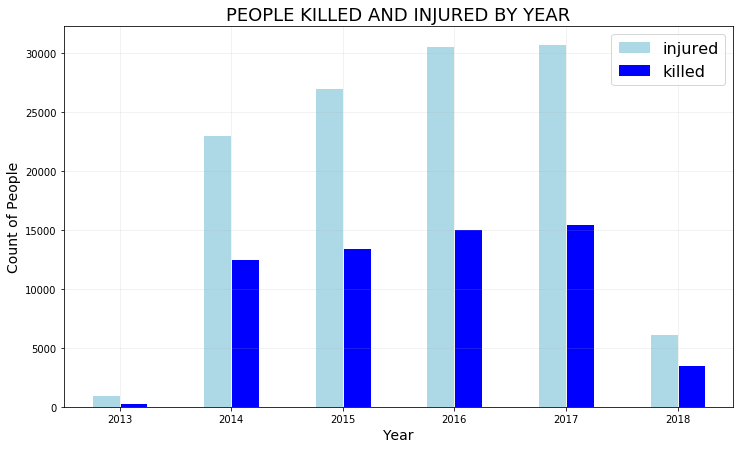

In [7]:
fig = df_gun_crimes.groupby("year")[["injured","killed"]].sum().plot(kind="bar",stacked=False,
                                                                figsize=(12,7),
                                                                linewidth = 1,
                                                                color=["lightblue","blue"],
                                                                edgecolor = "w")
plt.grid(True,alpha=.2)
plt.xticks(rotation=0)
fig.set_facecolor("white")
plt.legend(prop={"size":16})
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count of People', fontsize=14)
plt.title("PEOPLE KILLED AND INJURED BY YEAR",fontsize = 18);

In [8]:
# now, plotting the same chart but per Million people
by_year = df_gun_crimes.groupby("year")[["injured","killed"]].sum()
by_year["df_US_populationUS"] = [df_US_population["2013"].sum(),df_US_population["2014"].sum(),df_US_population["2015"].sum(),df_US_population["2016"].sum(),df_US_population["2017"].sum(),df_US_population["2018"].sum()]
by_year["injured_per_Million"] = by_year["injured"]/by_year["df_US_populationUS"]
by_year["killed_per_Million"] = by_year["killed"]/by_year["df_US_populationUS"]
by_year = by_year.drop(["injured","killed","df_US_populationUS"],axis=1)
by_year

,injured_per_Million,killed_per_Million
year,,
2013,3.095804,1.002421
2014,72.192008,39.410271
2015,83.998921,42.001018
2016,94.556088,46.585416
2017,94.262181,47.620776
2018,18.945768,10.846767


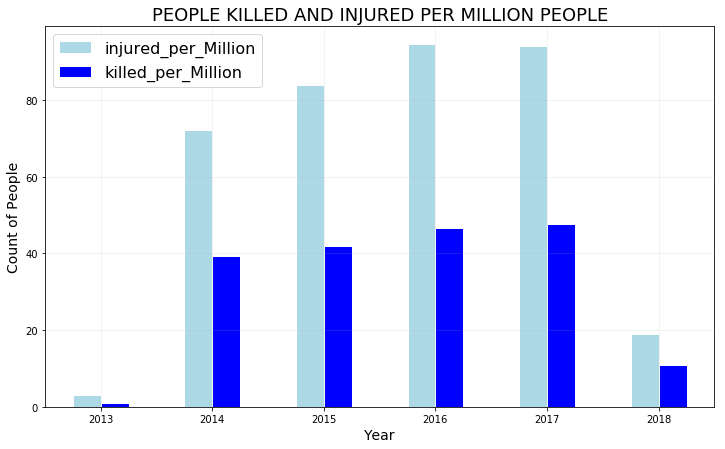

In [9]:
fig = by_year.plot(kind="bar",stacked=False,figsize=(12,7),linewidth = 1,color=["lightblue","blue"],edgecolor = "w")
plt.grid(True,alpha=.2)
plt.xticks(rotation=0)
fig.set_facecolor("white")
plt.legend(prop={"size":16})
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count of People', fontsize=14)
plt.title("PEOPLE KILLED AND INJURED PER MILLION PEOPLE",fontsize = 18);
# This plots looks pretty much the same... when we do the same by state, there is a significant difference

### The graph above shows how 2013 data is incomplete. At a first look, it seems as incidents are trending up in the last five years

### TOP 15 STATES IN KILLINGS AND INJURIES

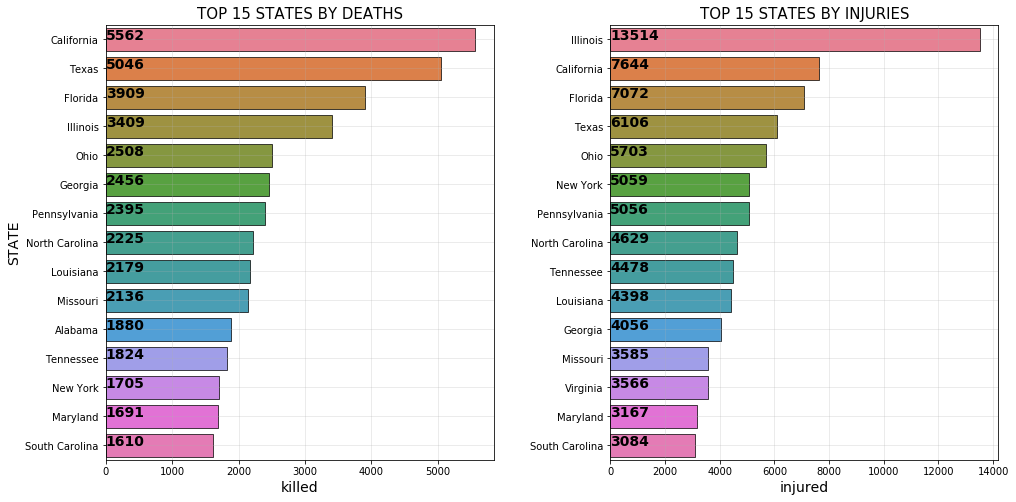

In [10]:
state_kill   = df_gun_crimes.groupby("state")["killed"].sum().reset_index().sort_values(by="killed",ascending=False)
state_injury = df_gun_crimes.groupby("state")["injured"].sum().reset_index().sort_values(by="injured",ascending=False)


fig = plt.figure(figsize=(16,8))
plt.subplot(121)
ax = sns.barplot("killed","state",
                 data=state_kill[:15],palette="husl",linewidth=0.7,edgecolor = "k")  # hls/husl chooses the palette based on evenly spaced colors taken out from a circular color space. husl controls for color intensity.
plt.ylabel("STATE",fontsize=14)
plt.xlabel("killed",fontsize=14)
plt.title("TOP 15 STATES BY DEATHS",fontsize=15)
for i,j in enumerate(state_kill["killed"][:15]):
    ax.text(.9,i,j,weight="bold",fontsize=14)
plt.grid(True,alpha= .3)

plt.subplot(122)
ax = sns.barplot("injured","state",
                 data=state_injury[:15],palette="husl",linewidth=0.7,edgecolor = "k")
plt.ylabel("")
plt.xlabel("injured",fontsize=14)
plt.subplots_adjust(wspace=.3)
plt.title("TOP 15 STATES BY INJURIES",fontsize=15)
for i,j in enumerate(state_injury["injured"][:15]):
    ax.text(.9,i,j,weight="bold",fontsize=14)
plt.grid(True,alpha= .3)
    
fig.set_facecolor("w")

### To no surprise, the graph shows how with few exceptions (Louisiana for example) the count of killed and injured tend to follow the population size of states i.e. the most populated states have the higher number of killed and injured

In [11]:
# from df_US_population df, calculating average df_US_populationulation for each state
df_US_population["df_US_populationST_avg"] = np.mean(df_US_population,axis=1)
df_US_population_ST = df_US_population[["index","df_US_populationST_avg"]]
df_US_population_ST = df_US_population_ST.rename(columns={"index":"state"})
# calculating killed per million people, and sorting descending for plot
state_kill = df_gun_crimes.groupby("state")["killed"].sum().reset_index().sort_values(by="killed",ascending=False)
state_kill_pM = pd.merge(state_kill, df_US_population_ST, on="state")
state_kill_pM["killed_per_Million"] = state_kill_pM["killed"]/state_kill_pM["df_US_populationST_avg"]
state_kill_pM = state_kill_pM.drop(["killed","df_US_populationST_avg"],axis=1)
state_kill_pM = state_kill_pM.reset_index().sort_values(by="killed_per_Million",ascending=False).round(decimals=1)
# calculating injured per million people, and sorting descending for plot
state_injury = df_gun_crimes.groupby("state")["injured"].sum().reset_index().sort_values(by="injured",ascending=False)
state_injury_pM = pd.merge(state_injury, df_US_population_ST, on="state")
state_injury_pM["injured_per_Million"] = state_injury_pM["injured"]/state_injury_pM["df_US_populationST_avg"]
state_injury_pM = state_injury_pM.drop(["injured","df_US_populationST_avg"],axis=1)
state_injury_pM = state_injury_pM.reset_index().sort_values(by="injured_per_Million",ascending=False).round(decimals=1)

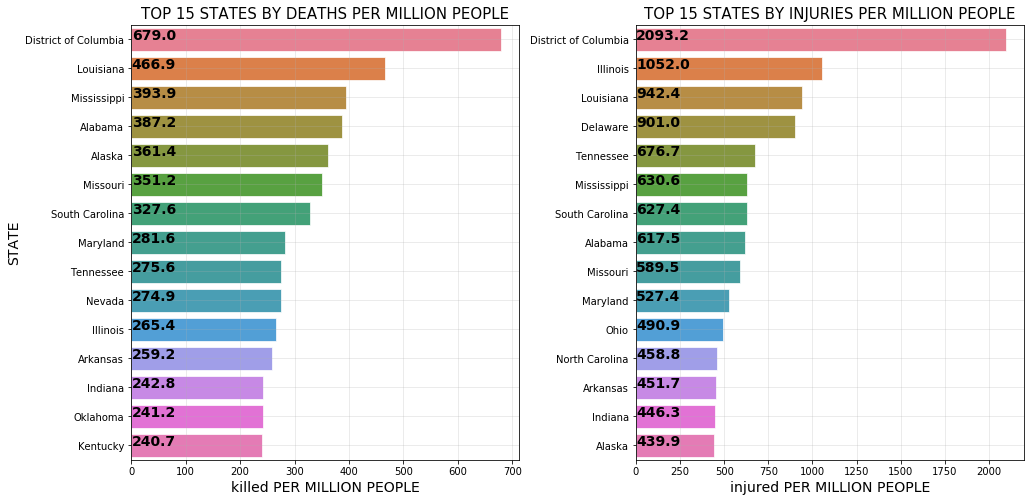

In [12]:
fig = plt.figure(figsize=(16,8))
plt.subplot(121)
ax = sns.barplot("killed_per_Million","state",
                 data=state_kill_pM[:15],palette="husl",linewidth=0.7,edgecolor = "w")  # hls/husl chooses the palette based on evenly spaced colors taken out from a circular color space. husl controls for color intensity.
plt.ylabel("STATE",fontsize=14)
plt.xlabel("killed PER MILLION PEOPLE",fontsize=14)
plt.title("TOP 15 STATES BY DEATHS PER MILLION PEOPLE",fontsize=15)
for i,j in enumerate(state_kill_pM["killed_per_Million"][:15]):
    ax.text(.9,i,j,weight="bold",fontsize=14)
plt.grid(True,alpha= .3)

plt.subplot(122)
ax = sns.barplot("injured_per_Million","state",
                 data=state_injury_pM[:15],palette="husl",linewidth=0.7,edgecolor = "w")
plt.ylabel("")
plt.xlabel("injured PER MILLION PEOPLE",fontsize=14)
plt.subplots_adjust(wspace=.3)
plt.title("TOP 15 STATES BY INJURIES PER MILLION PEOPLE",fontsize=15)
for i,j in enumerate(state_injury_pM["injured_per_Million"][:15]):
    ax.text(.9,i,j,weight="bold",fontsize=14)
plt.grid(True,alpha= .3)    
fig.set_facecolor("w")
plt.savefig('US_Gun_Violence_Top_15_States_2013-2018_data_pM.png')

### Since District of Columbia data is not included in any of the 50 states, it has been separated and to our surprise DC has been found to be the area with a greater count of incidents per million people.

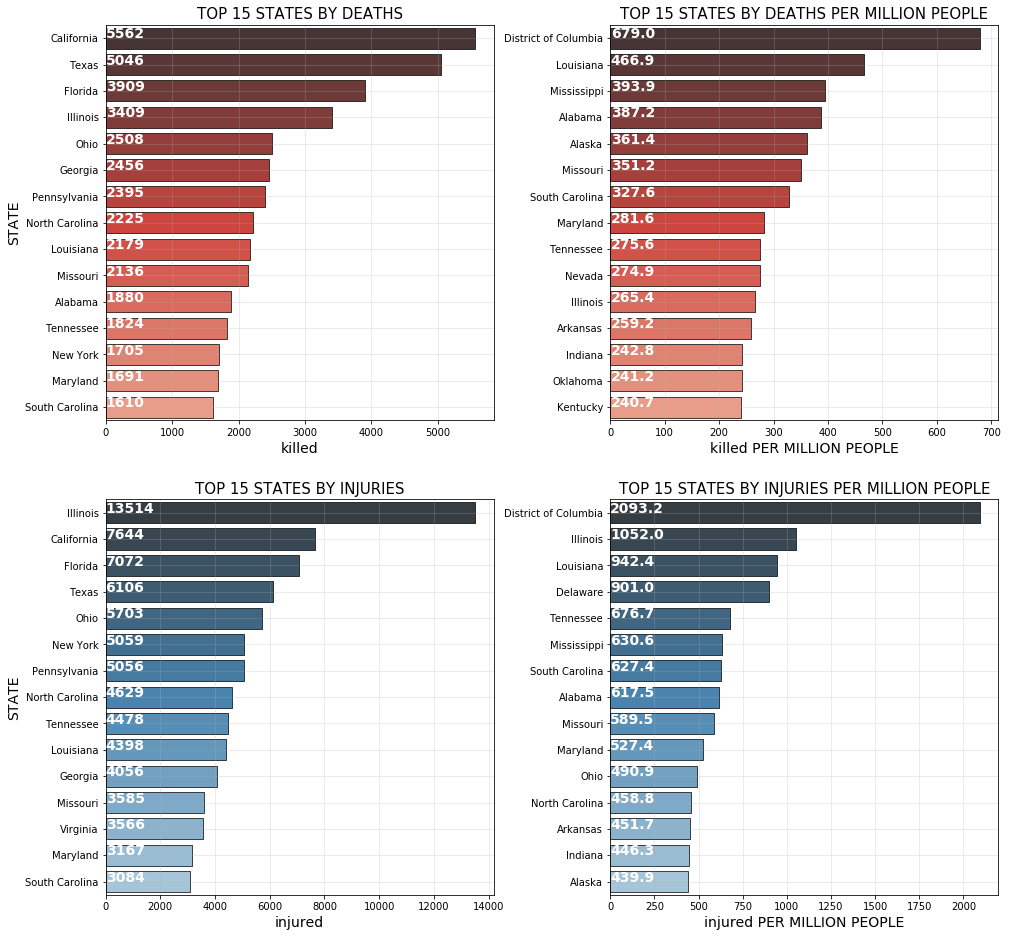

In [13]:
fig = plt.figure(figsize=(16,16))
plt.subplot(221)
ax = sns.barplot("killed","state",
                 data=state_kill[:15],palette="Reds_d",linewidth=0.7,edgecolor = "k")  # hls/husl chooses the palette based on evenly spaced colors taken out from a circular color space. husl controls for color intensity.
plt.ylabel("STATE",fontsize=14)
plt.xlabel("killed",fontsize=14)
plt.title("TOP 15 STATES BY DEATHS",fontsize=15)
for i,j in enumerate(state_kill["killed"][:15]):
    ax.text(.9,i,j,weight="bold",fontsize=14,color="w")
plt.grid(True,alpha= .3)

plt.subplot(223)
ax = sns.barplot("injured","state",
                 data=state_injury[:15],palette="Blues_d",linewidth=0.7,edgecolor = "k")
plt.ylabel("STATE",fontsize=14)
plt.xlabel("injured",fontsize=14)
plt.subplots_adjust(wspace=.3)
plt.title("TOP 15 STATES BY INJURIES",fontsize=15)
for i,j in enumerate(state_injury["injured"][:15]):
    ax.text(.9,i,j,weight="bold",fontsize=14,color="w")
plt.grid(True,alpha= .3)

plt.subplot(222)
ax = sns.barplot("killed_per_Million","state",
                 data=state_kill_pM[:15],palette="Reds_d",linewidth=0.7,edgecolor = "k")  # hls/husl chooses the palette based on evenly spaced colors taken out from a circular color space. husl controls for color intensity.
plt.ylabel("")
plt.xlabel("killed PER MILLION PEOPLE",fontsize=14)
plt.title("TOP 15 STATES BY DEATHS PER MILLION PEOPLE",fontsize=15)
for i,j in enumerate(state_kill_pM["killed_per_Million"][:15]):
    ax.text(.9,i,j,weight="bold",fontsize=14,color="w")
plt.grid(True,alpha= .3)

plt.subplot(224)
ax = sns.barplot("injured_per_Million","state",
                 data=state_injury_pM[:15],palette="Blues_d",linewidth=0.7,edgecolor = "k")
plt.ylabel("")
plt.xlabel("injured PER MILLION PEOPLE",fontsize=14)
plt.subplots_adjust(wspace=.3)
plt.title("TOP 15 STATES BY INJURIES PER MILLION PEOPLE",fontsize=15)
for i,j in enumerate(state_injury_pM["injured_per_Million"][:15]):
    ax.text(.9,i,j,weight="bold",fontsize=14,color="w")
plt.grid(True,alpha= .3)    
fig.set_facecolor("w")
plt.savefig('US_Gun_Violence_Top_15_States_2013-2018_data_Both.png')

### Which states have the most gun violence incidents?
Using the Gun Violence dataset, we compared the US states by adding up all the deaths and injuries for each state (for the time frame data was collected). Our findings seemed biased towards the more populated states, so we plotted these numbers on a per million people basis. The results show that when looking at the deaths and injuries on a per million basis, California, Texas, Florida, Illinois and Ohio are NO longer at the top 5 for either deaths or injuries, and shows the District of Columbia is the most violent place per both metrics, deaths and injuries per million people.

### GUN TYPE WORDCLOUD

In [14]:
# Removing white spaces, ###:: & ###: patterns, Unknown, keeping detailed description of guns, each separated by ","
df_gun_crimes["gun_type"] = df_gun_crimes["gun_type"].str.replace(" ","")
df_gun_crimes["gun_type"] = df_gun_crimes["gun_type"].str.replace(r"[\d]{3}:{2}","")
df_gun_crimes["gun_type"] = df_gun_crimes["gun_type"].str.replace(r"[\d]{2}:{2}","")
df_gun_crimes["gun_type"] = df_gun_crimes["gun_type"].str.replace(r"[\d]:{2}","")
df_gun_crimes["gun_type"] = df_gun_crimes["gun_type"].str.replace(r"[\d]{3}:{1}","")
df_gun_crimes["gun_type"] = df_gun_crimes["gun_type"].str.replace(r"[\d]{2}:{1}","")
df_gun_crimes["gun_type"] = df_gun_crimes["gun_type"].str.replace(r"[\d]:{1}","")
df_gun_crimes["gun_type"] = df_gun_crimes["gun_type"].str.replace("Unknown|[\]-]","")
df_gun_crimes["gun_type"] = df_gun_crimes["gun_type"].str.replace("[\[]","_")
df_gun_crimes["gun_type"] = df_gun_crimes["gun_type"].str.replace(r"[|]{2}",",")
df_gun_crimes["gun_type"] = df_gun_crimes["gun_type"].str.replace(r"[|]{1}",",")

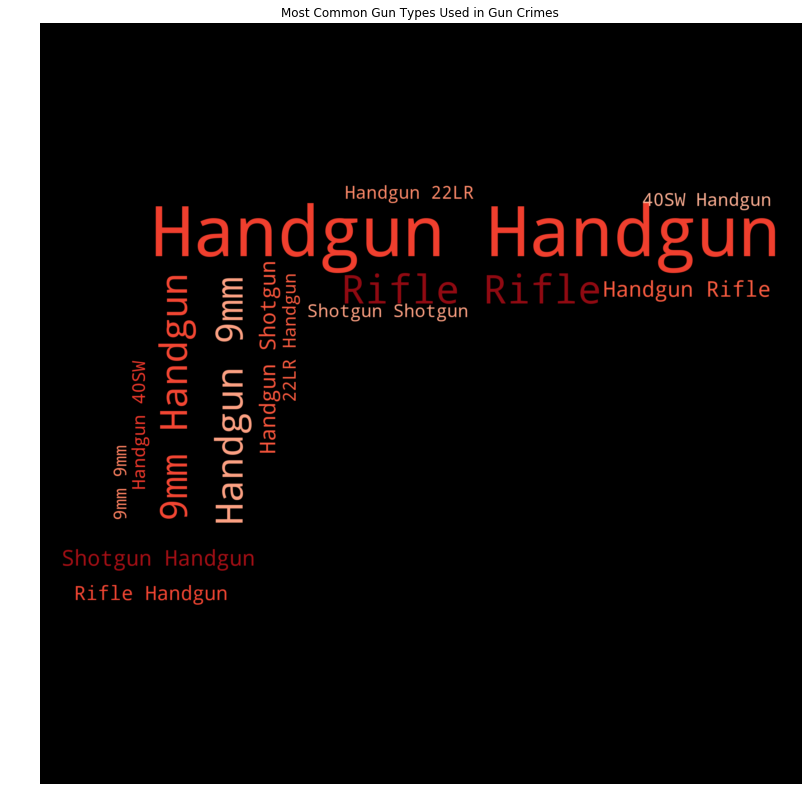

In [15]:
gn = df_gun_crimes[df_gun_crimes["gun_type"].notnull()]
g_types = gn["gun_type"].str.cat(sep=",")

gun_mask = np.array(Image.open( "Gun_outline.jpg"))
w = WordCloud(background_color="black", colormap="Reds", scale=5, max_words=50, collocations=True,
              max_font_size=40, min_font_size=10, mask=gun_mask).generate(g_types) 
# collocations=False => gets rid of words that are frequently grouped together in text
plt.figure(figsize=(14,14))
plt.imshow(w,interpolation="bilinear")
plt.axis("off")
plt.plot()
plt.title("Most Common Gun Types Used in Gun Crimes")
plt.savefig('Gun_Type_WordCloud.png')

### Which types of guns are used more frequently?
After cleaning up the gun type column, we generated a word cloud to identify the most common gun type (handgun the most common) and could also see the least common gun (AK 47) because the gn types were not enough to fill the cloud.  By allowing pairs of words to show up in the cloud, we generated the above gun cloud.  Hangun Handgun the most frequent combination of guns used in these incidents.

### INCIDENT LOCATION WORDCLOUD

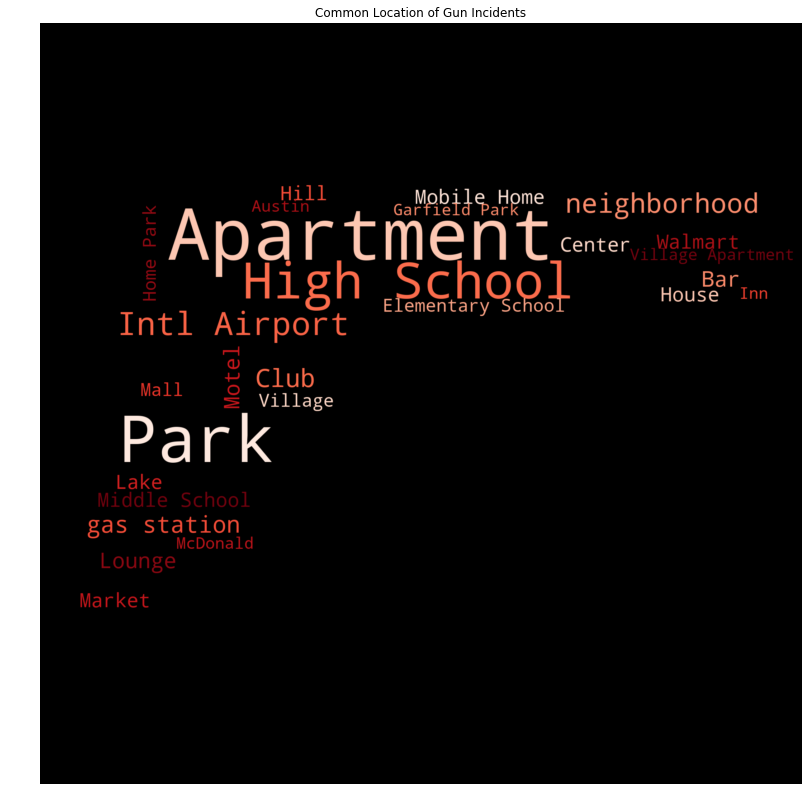

In [16]:
cl = df_gun_crimes[df_gun_crimes["location_description"].notnull()]
cl["location_description"] = cl["location_description"].str.replace("International","Intl")
cl["location_description"] = cl["location_description"].str.replace("Int'l","Intl")
c_location = cl["location_description"].str.cat(sep=" ")

gun_mask = np.array(Image.open( "Gun_outline.jpg"))
w = WordCloud(background_color="black", colormap="Reds", scale=5, max_words=50, collocations=True,
              max_font_size=40, min_font_size=8, mask=gun_mask).generate(c_location) 
# collocations=False => gets rid of words that are frequently grouped together in text
plt.figure(figsize=(14,14))
plt.imshow(w,interpolation="bilinear")
plt.axis("off")
plt.plot()
plt.title("Common Location of Gun Incidents")
plt.savefig('Crime_Location_WordCloud.png')

### Which locations are more prone to have a gun violence incident?
The image above was generated from the top 50 gun violence incidents locations. At first, we expected locations such as "Bar" and "Motel" to be in the top and it did not cross our minds that "Intl Airport" would be there, however data proved our intuition wrong. We were most shocked to see that "Elementary", "Middle" and "High school" show up in the top 50 as you think of these as safe places full of innocent beings.

### GUN KILLS VS GUN LAWS

In [17]:
# LOADING GUN LAWS DATA AND MERGING WITH KILL PER MILLION DATA FOR COMPARISON
xls = pd.ExcelFile("TL-283_State Firearm Law Database_v1.3.xlsx")
df_gun_laws_r = pd.read_excel(xls, "Restrictive", header=3) # Created a table in xls "Restrictive" worksheet of all restrictive laws by state
df_gun_laws_r = df_gun_laws_r.rename(columns={"Row Labels":"state","Count of Effect":"# of Restrictive Laws"})
df_gun_laws = pd.merge(state_kill_pM, df_gun_laws_r, on="state")
df_gun_laws_p = pd.read_excel(xls, "Permissive", header=3) # Created a table in xls "Permissive" worksheet of all permissive laws by state
df_gun_laws_p = df_gun_laws_p.rename(columns={"Row Labels":"state","Count of Effect":"# of Permissive Laws"})
df_gun_laws = pd.merge(df_gun_laws, df_gun_laws_p, on="state")
df_gun_laws = df_gun_laws.rename(columns={"state":"STATE","Count of Effect":"# of Permissive Laws"})
df_gun_laws = df_gun_laws.drop(["index"],axis=1)
df_gun_laws.head()

,STATE,killed_per_Million,# of Restrictive Laws,# of Permissive Laws
0,District of Columbia,679.0,13,1
1,Louisiana,466.9,3,6
2,Mississippi,393.9,3,5
3,Alabama,387.2,5,3
4,Alaska,361.4,3,4


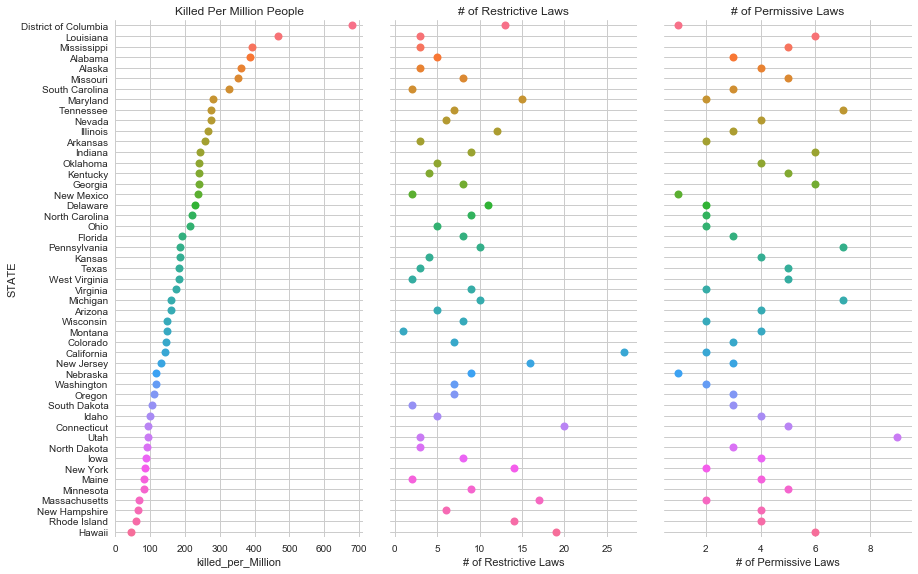

In [18]:
# PLOTTING killed PER MILLION, # OF RESTRICTIVE LAWS AND # OF PERMISSIVE LAWS SIDE BY SIDE
sns.set_context('talk')
sns.set(style="whitegrid")
# Makeing a PairGrid
g = sns.PairGrid(df_gun_laws,
                 x_vars=df_gun_laws.columns[1:4], y_vars=["STATE"],
                 size=8,aspect=0.5)
# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=8, orient="h",
      palette="husl", edgecolor="gray")
# Giving titles to each graph
titles = ["Killed Per Million People", "# of Restrictive Laws", "# of Permissive Laws"]
for ax, title in zip(g.axes.flat, titles):
    # Seting a different title for each axes
    ax.set(title=title)
    # Turning grids on
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
# Removing main axes, leaving grids
sns.despine(left=True, bottom=True) 

### Do states with the higher number of restrictive laws have less gun violence?
To answer this, we estimated the number of restrictive and permissive gun laws per state from the US gun laws dataset, and plotted it next to the total killed per million people in the state. The District of Columbia (most killed per million people) only has 1 permissive law vs 13 restrictive laws. On the other hand, California, the state with the most restrictive laws (27 per this dataset) and only 2 permissive ones, does not rank in the bottom 25%. This could mean restrictive laws are not necessarily impacting gun violence as many expect them to.

### COUNT OF INCIDENTS BY STATE

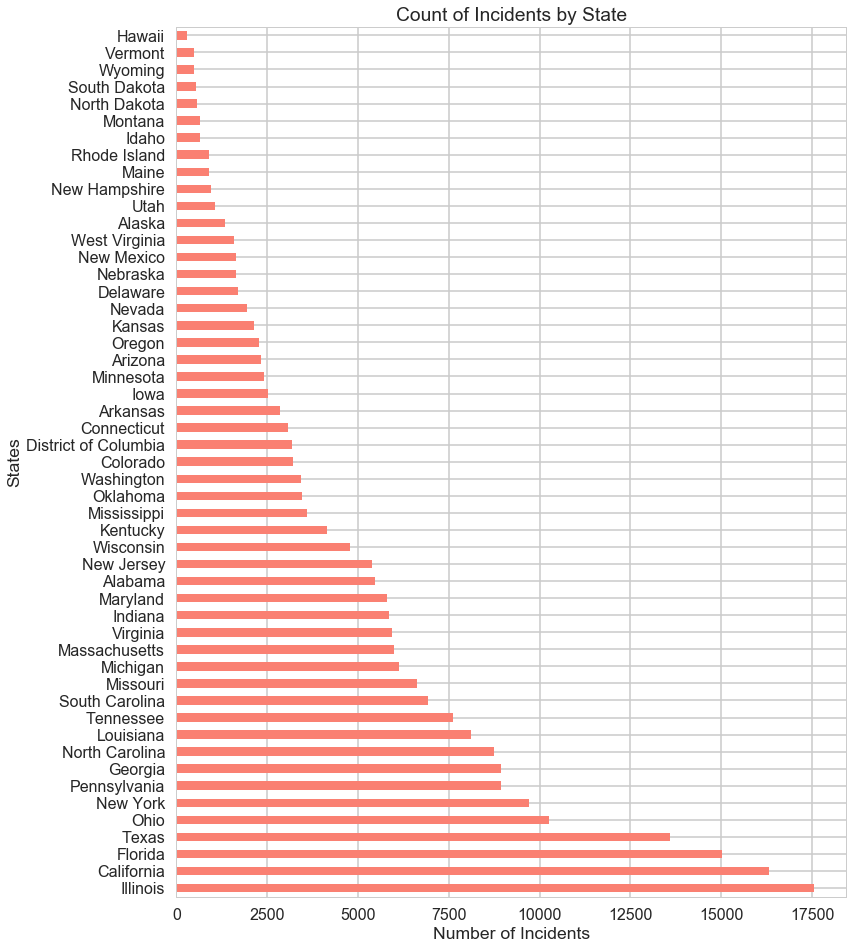

In [19]:
sns.set_context('poster')
df_gun_crimes['state'].value_counts().plot(kind='barh', figsize=(12, 16), color='salmon')
plt.title("Count of Incidents by State")
plt.ylabel("States")
plt.xlabel("Number of Incidents")
plt.savefig('Most_Incidents_Ascending.png')

### Which states have the higest number of incidents and the lowest?
After adding the incidents (events with at least with 1 kill or 1 injury) for each state, and sorting descending, we can see that Hawaii, Vermont and Wyoming have the least gun violence incidents and Illinois, California and Florida have the most gun violence incidents.

### STATE WISE NUMBER OF GUN VIOLENCE INCIDENTS

In [20]:
df_states = df_gun_crimes['state'].value_counts()
statesdf = pd.DataFrame()
statesdf['state'] = df_states.index
statesdf['counts'] = df_states.values
state_to_code = {'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 'Delaware': 'DE',
                 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 'New Mexico': 'NM', 'Indiana': 'IN',
                 'Maryland': 'MD', 'Louisiana': 'LA', 'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN',
                 'Arizona': 'AZ', 'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT',
                 'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 'California': 'CA',
                 'Massachusetts': 'MA', 'West Virginia': 'WV', 'South Carolina': 'SC',
                 'New Hampshire': 'NH', 'Wisconsin': 'WI', 'Vermont': 'VT', 'Georgia': 'GA',
                 'North Dakota': 'ND', 'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK',
                 'Kentucky': 'KY', 'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH',
                 'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 'Colorado': 'CO',
                 'New Jersey': 'NJ', 'Washington': 'WA', 'North Carolina': 'NC', 'New York': 'NY',
                 'Texas': 'TX', 'Nevada': 'NV', 'Maine': 'ME'}
statesdf['state_code'] = statesdf['state'].apply(lambda x : state_to_code[x])
statesdf.head(15)

,state,counts,state_code
0,Illinois,17556,IL
1,California,16306,CA
2,Florida,15029,FL
3,Texas,13577,TX
4,Ohio,10244,OH
5,New York,9712,NY
6,Pennsylvania,8929,PA
7,Georgia,8925,GA
8,North Carolina,8739,NC
9,Louisiana,8103,LA


In [21]:
color_scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [dict(
        type='choropleth',
        colorscale = color_scl,
        autocolorscale = True,
        locations = statesdf['state_code'],
        z = statesdf['counts'],
        locationmode = 'USA-states',
        text = statesdf['state'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 1
            ) ),
        colorbar = dict(
            title = "Gun Violence Incidents")
        ) ]

layout = dict(
        title = 'Count of Gun Violence Incidents by State 2013-18Q1',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

### Where in the US are the states with the most gun violence incidents?
This does not show the District of Columbia, which has the highest # of incidents per million people.  We can see here that many of the more populated states come with the higher number of incidents.  We can also see that the Nort-West has a lower number of incidents.

## Bringing overdose opiates data

In [22]:
df_opiate_od = pd.read_csv("overdoses.csv" )
df_opiate_od.head() 

,State,Population,Deaths,Abbrev
0,Alabama,4833722,723,AL
1,Alaska,735132,124,AK
2,Arizona,6626624,1211,AZ
3,Arkansas,2959373,356,AR
4,California,38332521,4521,CA


In [23]:
df_opiate_od.rename(columns={'State':'state'},inplace=True) # Renaming the State variable to merge with gun violence dataset
df_opiate_od.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
state         50 non-null object
Population    50 non-null int64
Deaths        50 non-null int64
Abbrev        50 non-null object
dtypes: int64(2), object(2)
memory usage: 1.6+ KB


In [24]:
df_gun_crimes['incident_year'] = pd.to_datetime(df_gun_crimes['date'])
df_gun_crimes['incident_year'] = df_gun_crimes['incident_year'].dt.year

df_states = df_gun_crimes[df_gun_crimes['incident_year'] == 2014]['state'].value_counts()
statesdf = pd.DataFrame()
statesdf['state'] = df_states.index
statesdf['counts'] = df_states.values
statesdf = pd.merge(statesdf,df_opiate_od, on='state')
statesdf['Population']=statesdf['Population']/1000000 # 2014 df_US_population in Millions
statesdf['counts']=statesdf['counts']/statesdf['Population']
statesdf['Deaths']=statesdf['Deaths']/statesdf['Population']

In [25]:
data = [
    {
        'x': statesdf['Deaths'],
        'y': statesdf['counts'],
        'mode': 'markers',
        'text' : statesdf['Abbrev'],
        'marker': {
            'color': ["#bebada","#fdb462","#fb8072","#d9d9d9","#bc80bd","#b3de69","#8dd3c7","#80b1d3","#fccde5",
                      "#ffffb3","#bebada","#fdb462","#fb8072","#d9d9d9","#bc80bd","#b3de69","#8dd3c7","#80b1d3",
                      "#fccde5","#ffffb3","#bebada","#fdb462","#fb8072","#d9d9d9","#bc80bd","#b3de69","#8dd3c7",
                      "#80b1d3","#fccde5","#ffffb3","#bebada","#fdb462","#fb8072","#d9d9d9","#bc80bd","#b3de69",
                      "#8dd3c7","#80b1d3","#fccde5","#ffffb3","#bebada","#fdb462","#fb8072","#d9d9d9","#bc80bd",
                      "#b3de69","#8dd3c7","#80b1d3","#fccde5","#ffffb3"],
            'size': 15,
            'showscale' : False,
            'colorscale' : 'Earth',
            'opacity': 0.8
        }
    }
]

layout = go.Layout(title="Overdose Deaths Vs Gun Violence Incidents by State (2014)", 
                   xaxis=dict(title='Total Overdose Deaths Per Million People'),
                   yaxis=dict(title='Gun Violence Incidents Per Million People')
                  )
fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter-colorscale')

### Is opiate overdose and indicator for gun violance?
While there is not clear relation between gun crimes and opiates overdose deaths, it is worth observing that some states with high gun violance per million have significant issues with opiate overdose, this could be due to the need for opiates abusers to get drugs which drives them to commit gun crimes.

In [26]:
df_gun_crimes['impact'] = df_gun_crimes['killed'] + df_gun_crimes['injured'] ##Creating a new column to measure the most unfortunate incidents
df_incident_impact = df_gun_crimes.sort_values(['impact'], ascending=False)
df_incident_impact[['date', 'state', 'city_or_county', 'address', 'killed', 'injured']].head(10)

,date,state,city_or_county,address,killed,injured
130448,2016-06-12,Florida,Orlando,1912 S Orange Avenue,50,53
217151,2017-11-05,Texas,Sutherland Springs,216 4th St,27,20
101531,2015-12-02,California,San Bernardino,1365 South Waterman Avenue,16,19
232745,2018-02-14,Florida,Pompano Beach (Parkland),5901 Pine Island Rd,17,17
70511,2015-05-17,Texas,Waco,4671 S Jack Kultgen Fwy,9,18
195845,2017-07-01,Arkansas,Little Rock,220 W 6th St,0,25
137328,2016-07-25,Florida,Fort Myers,3580 Evans Ave,2,19
11566,2014-04-02,Texas,Fort Hood,Motor Pool Road and Tank Destroyer Boulevard,4,16
92624,2015-10-01,Oregon,Roseburg,1140 Umpqua College Rd,10,9
73,2013-05-12,Louisiana,New Orleans,Frenchmen Street,0,19


In [27]:
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]


def returnsize(x):
    if x > 200:
        return 60
    elif x > 80:
        return 40
    elif x > 30:
        return 25
    elif x > 10:
        return 15
    elif x > 5: 
        return 10
    else:
        return 5

df_incident_impact['size'] = df_incident_impact['impact'].apply(lambda x: returnsize(x))
dfs = df_incident_impact.head(50)
dfs['text'] = dfs['city_or_county'] + ', Killed:' + dfs['killed'].astype(str) + ', ' + dfs['date'].astype(str)

data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = dfs['longitude'],
        lat = dfs['latitude'],
        text = dfs['text'], 
        mode = 'markers',
        marker = dict(
            size = dfs['size'],
            opacity = 0.5,
            cmin = 0,
        ))]

layout = dict(
        title = 'Most Impactful Acts (Killed + Injured) Besides Oct 2017 Las Vegas Incident',
        colorbar = True,
        geo = dict(
            projection=dict( type='albers usa' ),
            subunitcolor = "rgb(221, 221, 221)",
            subunitwidth = 1.0
        ),
    )

fig = dict( data=data, layout=layout )
iplot( fig, validate=False)

### Which are the worst incidents of gun violence in recent history and where did they happen? 
The Gun Violence dataset provided location data by longitude and latitude for each violent act. The visual above shows the top 50 violent acts that where most impactful, measuring impact as the sum of people killed and people injured. Notice only one of the top 50 violent acts happened in the North-West. As a note for the reader, the data does not include the unfortunate incident that happened in October 2017 in Las Vegas Nevada.

### GUN VIOLENCE VS SCHOOL EDUCATION

In [28]:
ed_rank = pd.read_excel("2017 States School System Quality.xlsx")
ed_rank = ed_rank.rename(columns={"State":"state","Total Score":"Rank_Score" })
ed_rank = pd.merge(state_kill_pM, ed_rank, on="state")
ed_rank = ed_rank.drop(["index","Overall Rank"],axis=1)
# creating color column, with "green" if Rank_Score >= 60, else "orange"
ed_rank["color"]= 0
for i, row in ed_rank.iterrows():
    if ed_rank.Rank_Score[i] >= 60:
        ed_rank.color[i]="green"       
    else:
        ed_rank.color[i]="orange"
ed_rank.head()

,state,killed_per_Million,Rank_Score,Quality Rank,Safety Rank,color
0,District of Columbia,679.0,35.85,50,30,orange
1,Louisiana,466.9,27.42,44,51,orange
2,Mississippi,393.9,35.99,49,45,orange
3,Alabama,387.2,39.06,42,46,orange
4,Alaska,361.4,38.20,47,43,orange


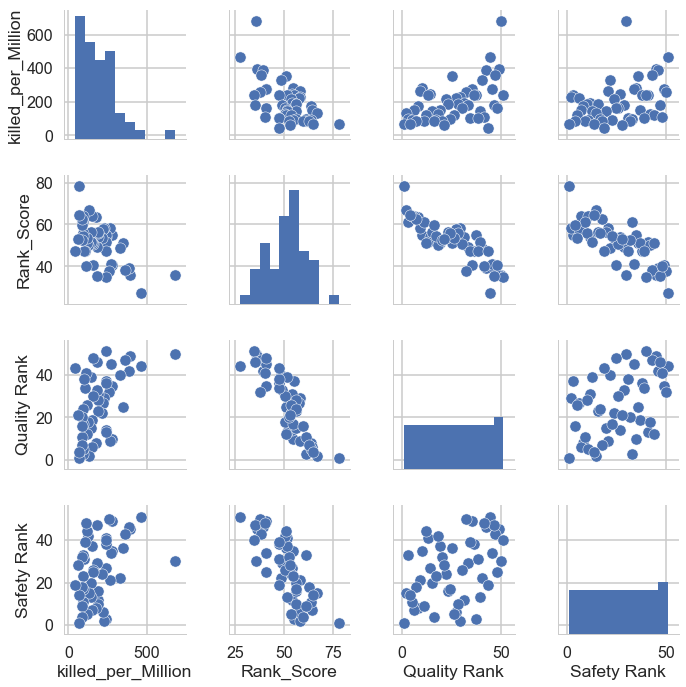

In [29]:
# Basic correlogram
sns.pairplot(ed_rank)
plt.show()

In [30]:
data = [
    {
        'x': ed_rank["Rank_Score"],
        'y': ed_rank["killed_per_Million"],
        'mode': 'markers',
        'text' : ed_rank["state"],
        'marker': {
            'color': "ed_rank.color",
            'size': 12,
            'showscale' : False,
            'colorscale' : 'Earth',
            'opacity': 0.5
        }
    }
]

layout = go.Layout  (title="State Education vs. State Gun Violence", 
                   xaxis=dict(title='State Education Performance Score %'),
                   yaxis=dict(title='Killed per Million People'),
                    )

layout.update(dict(shapes = [
        {
            'type': 'line',
            'xref': 'x',
            'yref': 'y',
            'x0': 60,
            'y0': 0,
            'x1': 60,
            'y1': 710,
            'fillcolor': '#d3d3d3',
            'opacity': 0.2,
            'line': { 'color': 'orange',
                'width': 4,
                     'dash':'dashdot'
            }
        }]
        ))
fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter-colorscale')

### Is there a correlation between education quality and gun violence?

   From the US school systems data, we obtained education performance score for states school systems, and plotted it versus the number of killed per million people in the state. There seems to be a correlation between them. Notice that when performance ranking > 60%, the # of people killed is less than 200 per million people in the state. This might open the debate about government focusing on education (schools) more than in correction (prisons)?